##### 16 Feb 2021

## Cab Rides EDA

In this exercise we will perform Exploratory Data Analysis on the Cab Rides data to better understand its nuances.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time, datetime
%matplotlib inline

In [2]:
df=pd.read_csv('../input/uberdrives/My Uber Drives - 2016.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Converting Dates to Datetime Type

We clearly see two columns that should be datetime category.  
We need to convert them into such.

When making changes to columns using column names, we must remove special characters like '*'.  
We do that using the below function.

In [3]:
df.columns=df.columns.str.replace('*','')
df.drop(index = 1155, axis = 0, inplace = True)
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Now we convert both the columns to datetime using the below function.

In [4]:
df['START_DATE']= pd.to_datetime(df['START_DATE'])
df['END_DATE']= pd.to_datetime(df['END_DATE'])
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


### Checking null values

Next, we immediately notice there are some missing values in PURPOSE column.  
Let's look into it further.

In [5]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

There are 502 missing values. This is almost 45% of the total observation.  
Hence, this cannot be imputed using regular means such as average, median or mode.  

Our current order of priority is to predict the missing values.  
The next few steps comprise the trial and error method of figuring out the best alternative to do so.

In [6]:
df.nunique()

START_DATE    1154
END_DATE      1154
CATEGORY         2
START          177
STOP           188
MILES          256
PURPOSE         10
dtype: int64

In [7]:
df.PURPOSE.value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [8]:
# Lets calculate the duration, as there might be some relation of it to PURPOSE of Cab ride.
df['MINUTES'] = df.END_DATE - df.START_DATE
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [9]:
# As Duration is in datetime format, we need to convert it to float type in order to use it for analysis.
df['MINUTES'] = df['MINUTES'].dt.total_seconds() /60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


Grouping Purpose by Miles to see if we can get any pattern.

In [10]:
pd.DataFrame({'MEAN': df.groupby(['PURPOSE'])['MILES'].mean().round(1), 
              'MIN' : df.groupby(['PURPOSE'])['MILES'].min(), 
              'MAX' : df.groupby(["PURPOSE"])['MILES'].max()}).reset_index()

,PURPOSE,MEAN,MIN,MAX
0,Airport/Travel,5.5,4.1,7.6
1,Between Offices,10.9,1.9,39.2
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,20.7,0.8,310.3
5,Errand/Supplies,4.0,0.5,22.3
6,Meal/Entertain,5.7,0.6,36.5
7,Meeting,15.2,0.7,201.0
8,Moving,4.6,3.3,6.1
9,Temporary Site,10.5,1.8,48.2


Lets use boxplot to better visualize the spread.

## Boxplots of MILES and MINUTES split by PURPOSE

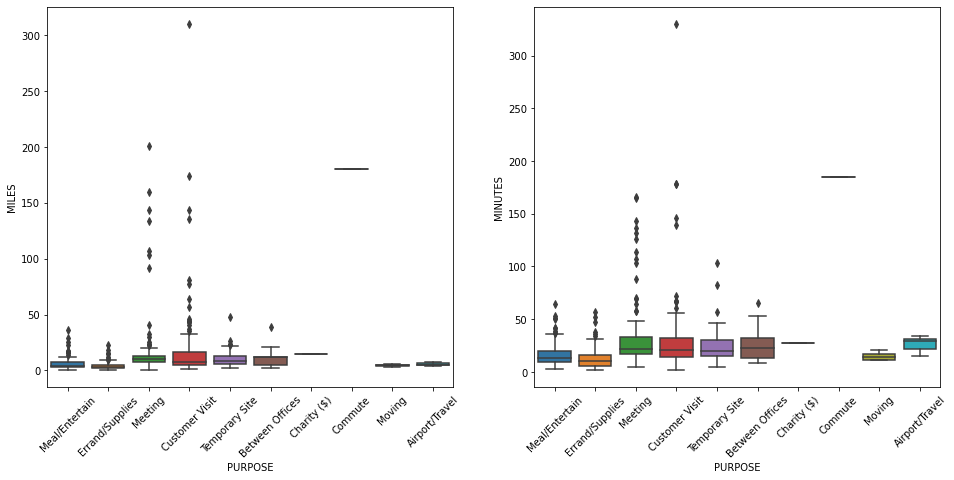

In [11]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES)
plt.xticks(rotation=45);

## Boxplots of MILES and MINUTES based on PURPOSE without outliers

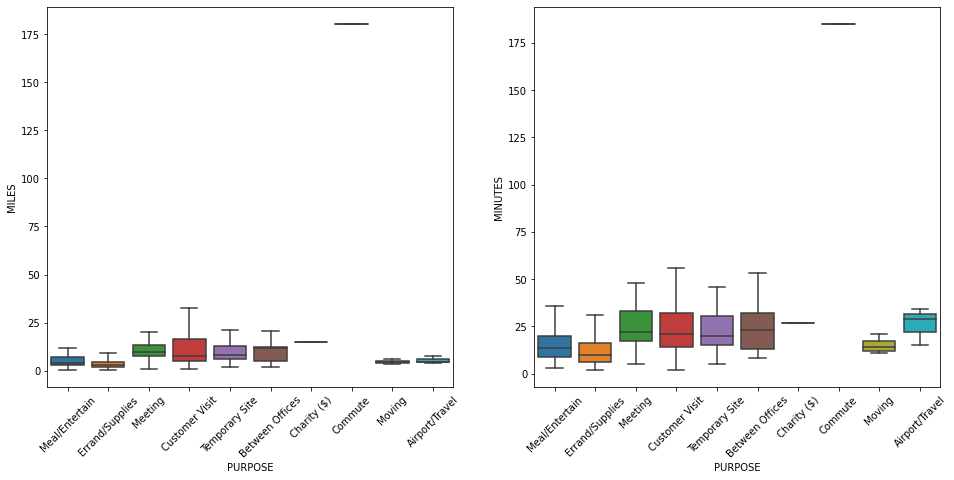

In [12]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES,showfliers=False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES,showfliers=False)
plt.xticks(rotation=45);

In [13]:
df_new = df[df['PURPOSE'].isin(['Commute','Charity ($)','Moving','Airport/Travel']) == False]

In [14]:
df_new.shape

(1146, 8)

In [15]:
df_new.PURPOSE.value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Name: PURPOSE, dtype: int64

In [16]:
df_new.groupby(df_new.PURPOSE)['MILES'].mean().round(3)

PURPOSE
Between Offices    10.944
Customer Visit     20.688
Errand/Supplies     3.969
Meal/Entertain      5.698
Meeting            15.248
Temporary Site     10.474
Name: MILES, dtype: float64

After trying multiple approaches, I've decided to predict the missing values using Decision Tree algorithm.

In [17]:
df_na = df[df.PURPOSE.isna()]
df_na.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0
32,2016-01-19 09:09:00,2016-01-19 09:23:00,Business,Whitebridge,Lake Wellingborough,7.2,NaN,14.0
85,2016-02-09 10:54:00,2016-02-09 11:07:00,Personal,Whitebridge,Northwoods,5.3,NaN,13.0
86,2016-02-09 11:43:00,2016-02-09 11:50:00,Personal,Northwoods,Tanglewood,3.0,NaN,7.0
87,2016-02-09 13:36:00,2016-02-09 13:52:00,Personal,Tanglewood,Preston,5.1,NaN,16.0


In [18]:
# Initiating Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')

In [19]:
# Dropping NA values for train dataset
df_a = df.dropna()

# Splitting dataset into independent and dependent variables
X = df_a[['CATEGORY','MILES','MINUTES']]
y = df_a.PURPOSE

# As X has categorical variables, converting all to numeric type using one hot encoding
X = pd.get_dummies(X, drop_first = True)

# Training dtree model 
dtree.fit(X,y)


DecisionTreeClassifier(criterion='entropy')

In [20]:
# Storing rows with null values in X_na
X_na = df_na[['CATEGORY','MILES','MINUTES']]

# Performing one-hot encoding
X_na = pd.get_dummies(X_na, drop_first = True)

# Making the predictions using dtree model
preds = dtree.predict(X_na)
preds.shape

(502,)

In [21]:
X_na['PURPOSE'] = preds
df['PURPOSE'].fillna(X_na['PURPOSE'], inplace = True)

In [22]:
# Lets check if all missing values have been filled
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
MINUTES       0
dtype: int64

In [23]:
# Lets check the difference in the PURPOSE variable
df.PURPOSE.value_counts()

Meeting            290
Errand/Supplies    257
Meal/Entertain     256
Customer Visit     174
Temporary Site      77
Moving              59
Between Offices     27
Charity ($)         10
Airport/Travel       4
Commute              1
Name: PURPOSE, dtype: int64

In [24]:
X_na.PURPOSE.value_counts()

Errand/Supplies    129
Meeting            103
Meal/Entertain      96
Customer Visit      73
Moving              55
Temporary Site      27
Charity ($)          9
Between Offices      9
Airport/Travel       1
Name: PURPOSE, dtype: int64

Now that we have all the date, let's see what all inferences can we draw from this data.

# 1. How does the PURPOSE of Cab ride vary with time and distance?

### Boxplots of MILES and MINUTES based on PURPOSE (without outliers)

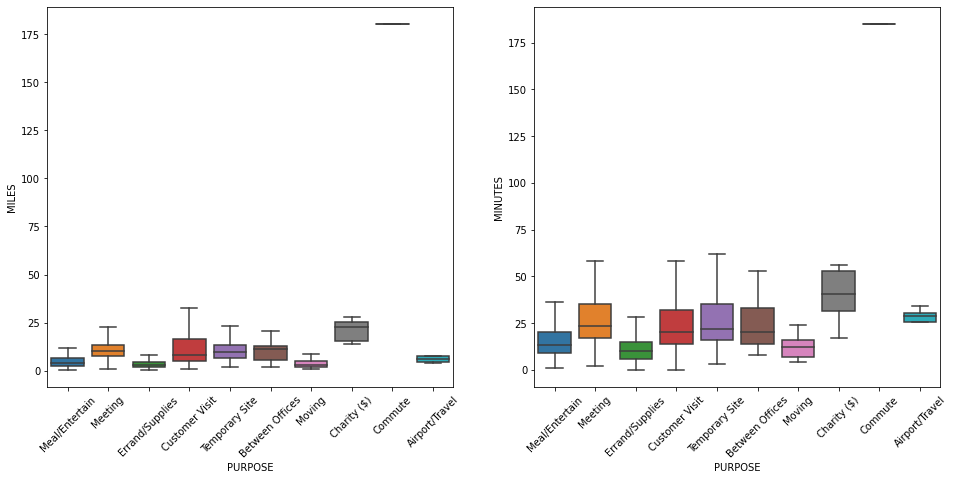

In [25]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES, showfliers = False)
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES, showfliers = False)
plt.xticks(rotation = 45);

## Boxplots of MILES and MINUTES based on PURPOSE (with outliers)

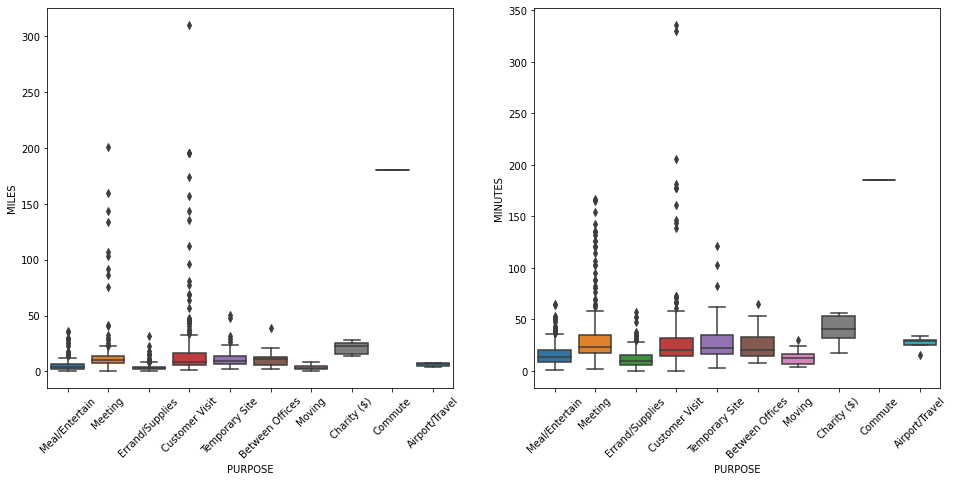

In [26]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES)
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES)
plt.xticks(rotation = 45);

We have successfully filled the missing values.  
Now that our dataset is complete, lets proceed to visualizing the data using meaningful plots.

In [27]:
df.nunique()

START_DATE    1154
END_DATE      1154
CATEGORY         2
START          177
STOP           188
MILES          256
PURPOSE         10
MINUTES         99
dtype: int64

First, we will look at the relationship between the distance (MILES) and time taken (MINUTES).

# 2. Is the distance proportional to the duration?

### Plots of MILES with respect to MINUTES

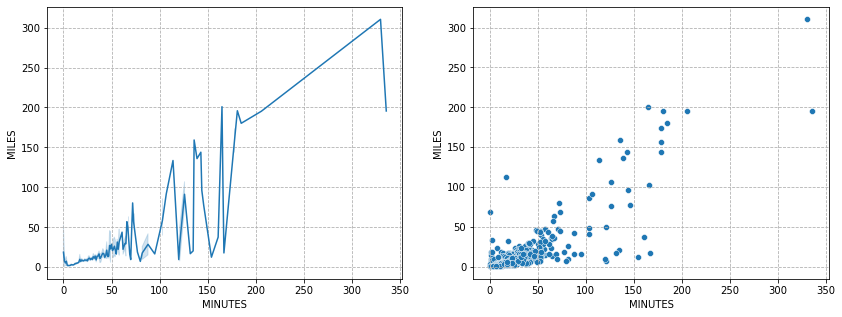

In [28]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.lineplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")
plt.subplot(1,2,2)
sns.scatterplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")

Clearly, the lineplot doesn't give us a clear representation of the spread.  
However, by plotting multiple plots, we can decide which plot to opt.  
Also, we see that our conventional logic, that distance is proportional to time, is challenged as some cab rides took more time for less distance.

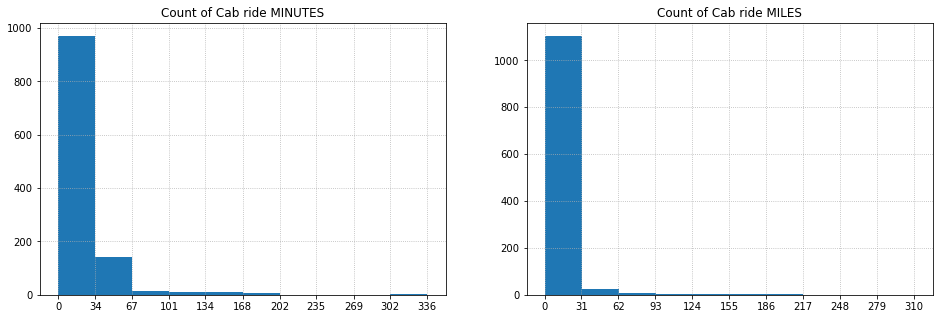

In [29]:
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
n, bins, patches = plt.hist(df.MINUTES)
plt.xticks(bins.round())
plt.grid(True, linestyle = "dotted")
plt.title("Count of Cab ride MINUTES")

plt.subplot(1,2,2)
n, bins, patches = plt.hist(df.MILES)
plt.xticks(bins.round())
plt.grid(True, linestyle = "dotted")
plt.title("Count of Cab ride MILES");

# 3. Is the distance time relation same for both Business and Personal Category?

### Plot of MILES and MINUTES w.r.t CATEGORY of Cab Ride

<AxesSubplot:xlabel='CATEGORY', ylabel='count'>

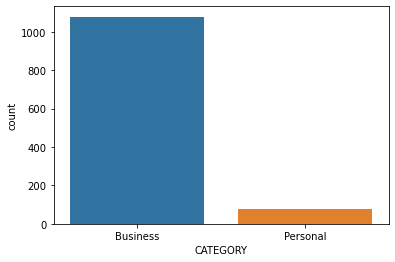

In [30]:
sns.countplot(data=df, x="CATEGORY")

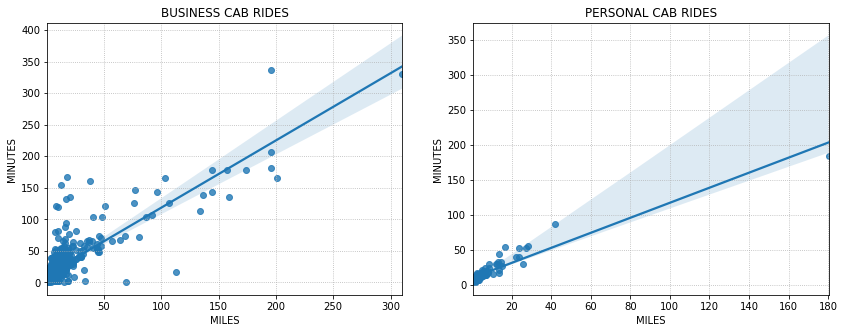

In [31]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.regplot(data=df[df['CATEGORY'] == 'Business'],x="MILES", y="MINUTES")
plt.title("BUSINESS CAB RIDES")
plt.grid(True, linestyle = ":")

plt.subplot(1,2,2)
sns.regplot(data=df[df['CATEGORY'] == 'Personal'],x="MILES", y="MINUTES")
plt.title("PERSONAL CAB RIDES")
plt.grid(True, linestyle = ":")

  The above charts show not only the trend of the scatter, but also the standard deviation of the same.

# 4. What is purpose (destination) of most cab rides?

### Split of rides based on PURPOSE

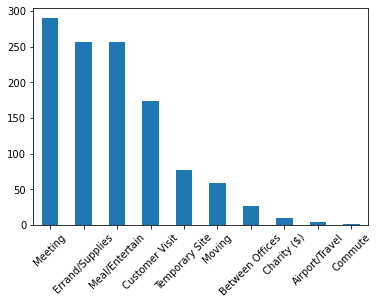

In [32]:
pd.Series(df['PURPOSE']).value_counts().plot(kind="bar")
plt.xticks(rotation = 45);

The major chunk of the cab rides are used for Meals/ Entertainment, Meetings, Errand/Supplies and Customer Visit

### Distribution of Cab rides based on Category

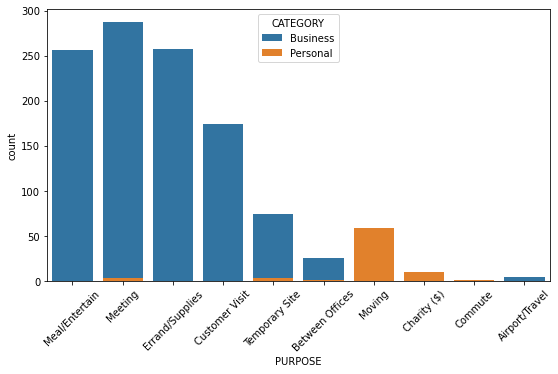

In [33]:
plt.figure(figsize = (9,5))
sns.countplot(data=df,x="PURPOSE", hue = 'CATEGORY', dodge = False)
plt.xticks(rotation = 45);

The above plot makes clear distinction on the Purpose of Business rides and Personal rides.  
This may give insight to cab aggregators to decide which sector to introduce new cabs in.

Now, lets see cabs usage based on location.  
We will see where most cab rides start and where they stop.

# 5. Where do customers most frequently take cabs?

### Frequency of Cab Rides START

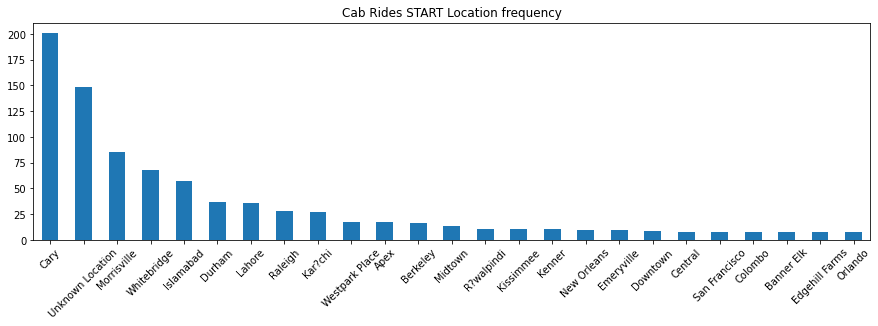

In [34]:
plt.figure(figsize = (15,4))
pd.Series(df['START']).value_counts()[:25].plot(kind="bar")
plt.title("Cab Rides START Location frequency")
plt.xticks(rotation = 45);

### Frequency of Cab Rides STOP

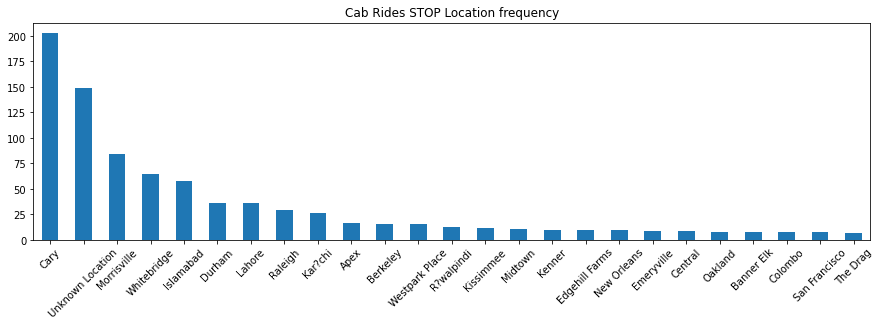

In [35]:
plt.figure(figsize=(15,4))
pd.Series(df['STOP']).value_counts()[:25].plot(kind = "bar")
plt.title("Cab Rides STOP Location frequency")
plt.xticks(rotation = 45);

The above graphs give us a visual understanding of frequency of rides.

# 6. When are cab rides more popular (frequently used)?

In [36]:
df['MONTH'] = pd.DatetimeIndex(df['END_DATE']).month_name()
df.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,12.0,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,January


<AxesSubplot:>

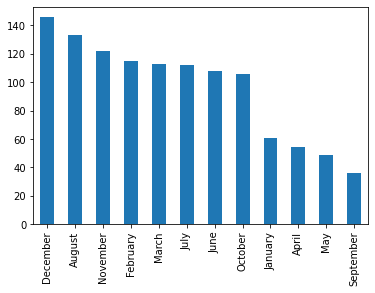

In [37]:
pd.Series(df['MONTH'].value_counts()).plot(kind="bar")

Lets split the above further for better analysis.

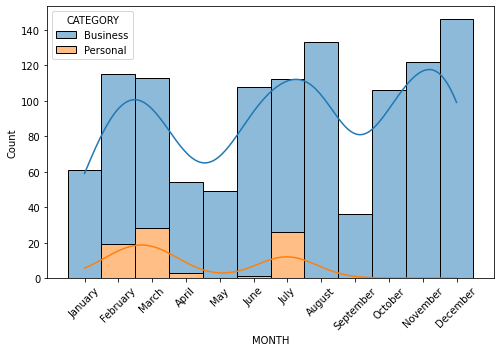

In [38]:
plt.figure(figsize = (8,5))
sns.histplot(data = df, x='MONTH', hue='CATEGORY', multiple = 'stack',kde = True, binwidth = 30)
plt.xticks(rotation = 45);

As we can see, clearly there is a seasonal trend.  
The Cab company could make use of this to increase their rides.

# Conclusion

From the above Exploratory Data Analysis, we have inferred the information followed below:
1. The mean of the data is deviated due to the outlier Commute cab ride. Apart from it, the rest conform to similar ranges.
2. Most of the cab rides are within a distance of 31 miles taking about 34 minutes.
3. Business Cab rides are not only more in volume, but also in distance travelled.
4. Main uses of cab rides are Meal/Entertainment, Customer visit, Meeting, Errand/Supplies.  
5. Cab traffic is mostly concentrated in 5 cities or localities.
6. Ac seasonal pattern of cab ride volume exists, which is highest on December.